**DEPUIS GOOGLE COLAB UNIQUEMENT**

In [ ]:
from google.colab import auth

In [ ]:
auth.authenticate_user()

In [ ]:
project_id = 'le-wagon-337814'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
! pip install --quiet git+https://github.com/christophelanson/icangetyoursmile

**---------------------------------------------------------------------------------------------------**

**EN LOCAL LANCER LES CELLULES A PARTIR D'ICI**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random

2022-03-08 10:44:26.101874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 10:44:26.101926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
from icangetyoursmile.trainer import upload_model_to_gcp
from icangetyoursmile.utils import run_full_model, fit_again

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape : (24, 64, 64, 3)
y shape : (24, 64, 64, 3)
X_test shape : (6, 64, 64, 3)
y_test shape : (6, 64, 64, 3)
X_visu shape : (5, 64, 64, 3)
y_visu shape : (5, 64, 64, 3)
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 16268.7783 - val_loss: 16509.6348
Epoch 2/5
1/1 [==============================] - 0s 163ms/step - loss: 16234.0820 - val_loss: 16480.1465
Epoch 3/5
1/1 [==============================] - 0s 150ms/step - loss: 16196.4834 - val_loss: 16443.9414
Epoch 4/5
1/1 [==============================] - 0s 149ms/step - loss: 16072.7793 - val_loss: 16401.0938
Epoch 5/5
1/1 [==============================] - 0s 157ms/step - loss: 16059.4453 - val_loss: 16353.3926
INFO:tensorflow:Assets written to: ./saved_models/U-net-colab-test/assets
1/1 [==============================] - 0s 24ms/step - loss: 15474.2227
uploading image_log to gcp
looking for files to upload
up

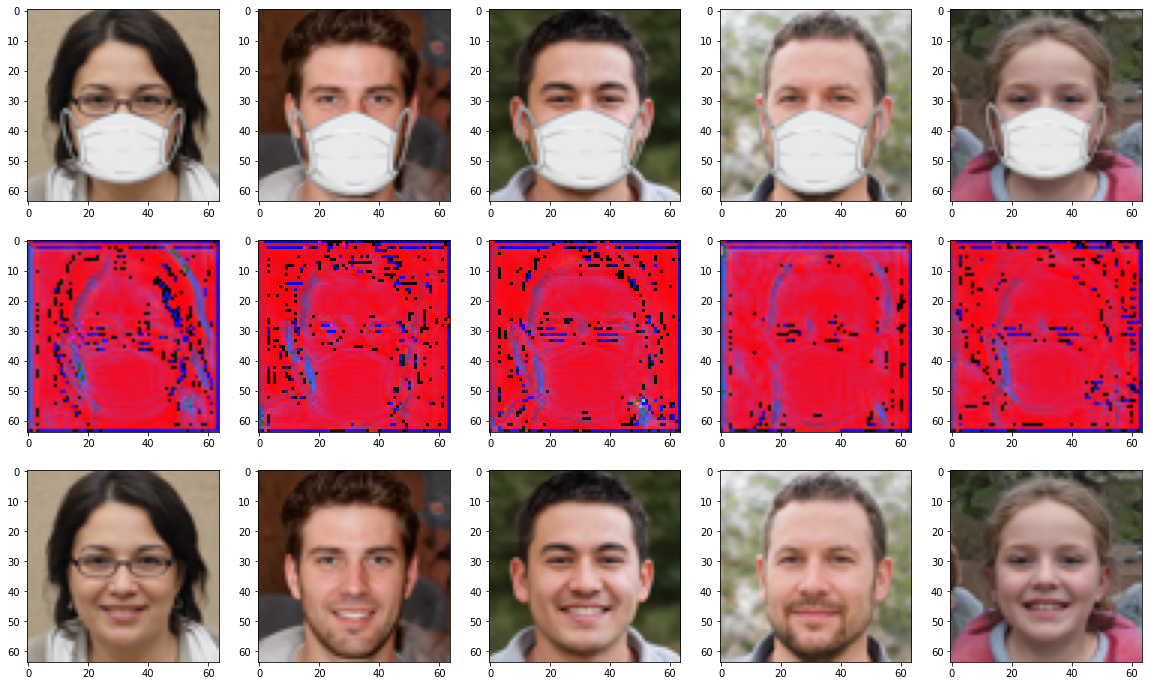

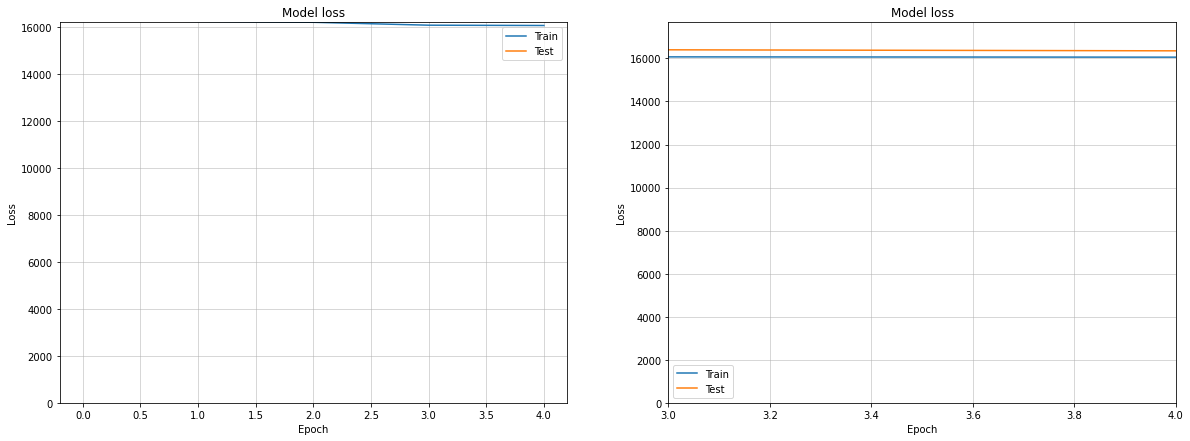

In [8]:
model_name = 'U-net-colab-test'
run_locally = True
sample_size = 30
image_size = (64,64)
unet_power = 2
epochs = 5
batch_size = 32
path_to_data = None # for notebook use None, else gcp path to data

run_full_model(model_name, run_locally=run_locally, unet_power=unet_power, sample_size=sample_size,
               epochs=epochs, image_size=image_size, random_seed=2,
               test_split=0.2, batch_size=batch_size, validation_split=0.2)
upload_model_to_gcp(model_name, run_locally=run_locally)

In [31]:
import pickle

In [32]:
with open('./image_logs/U-net-christophe_img_log.pickle', 'rb') as handle:
    image_log = pickle.load(handle)

/tmp/ipykernel_2147/2587638806.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


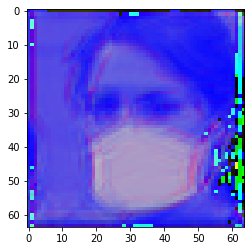

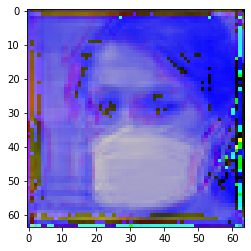

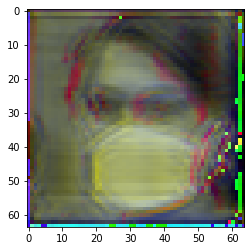

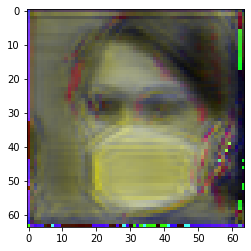

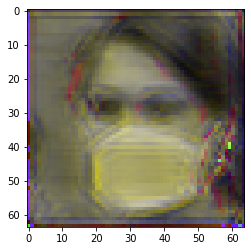

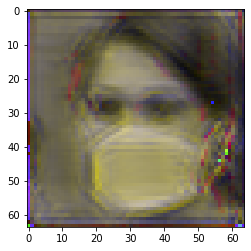

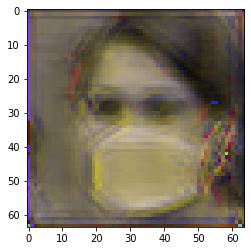

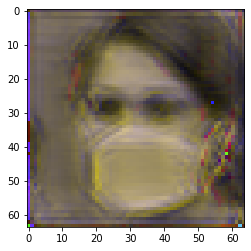

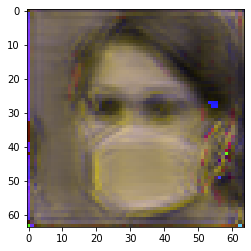

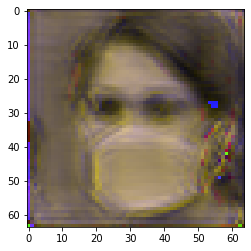

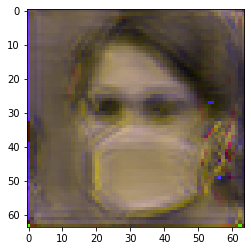

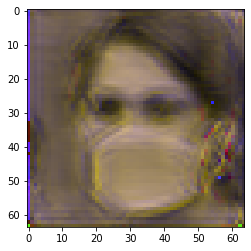

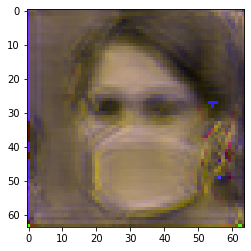

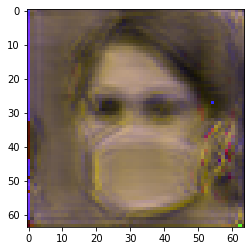

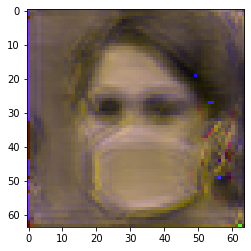

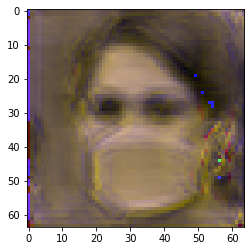

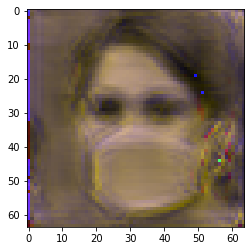

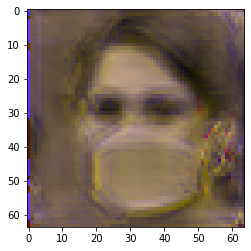

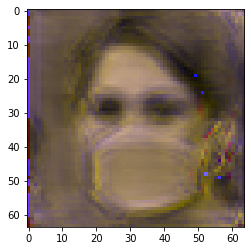

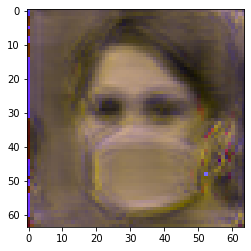

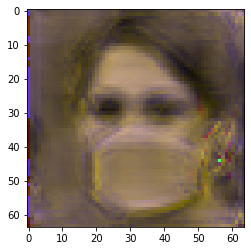

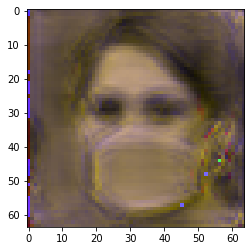

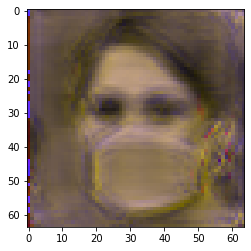

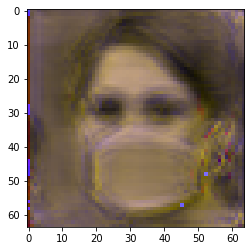

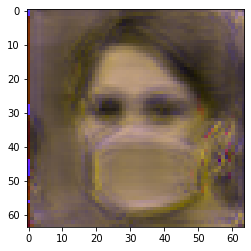

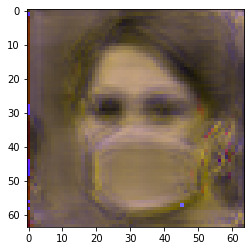

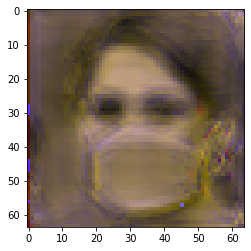

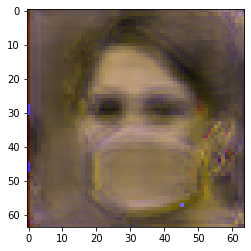

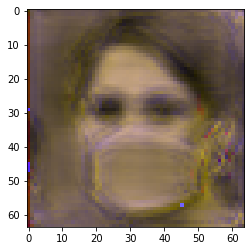

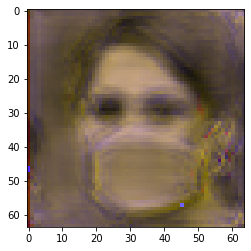

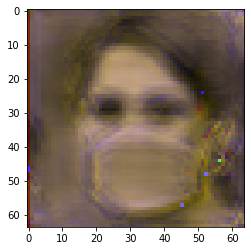

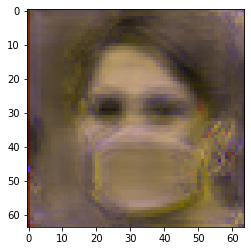

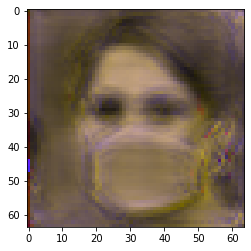

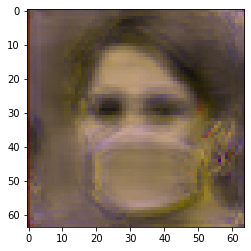

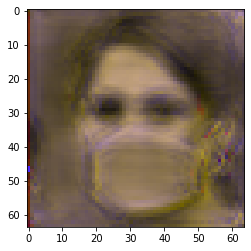

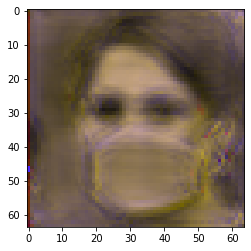

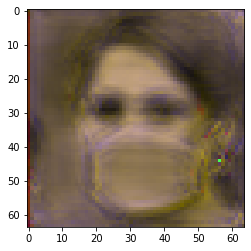

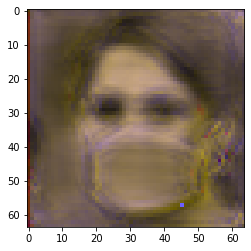

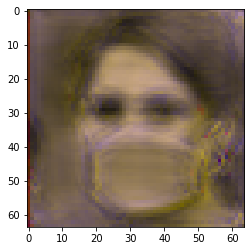

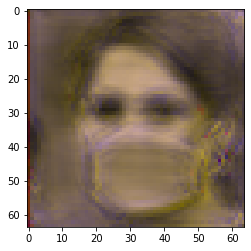

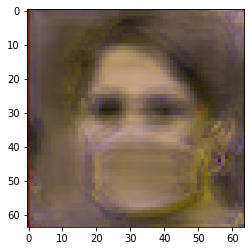

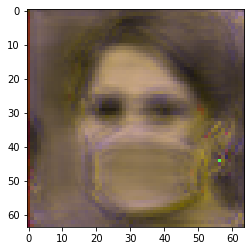

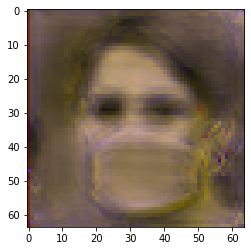

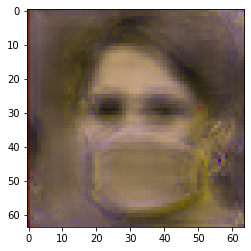

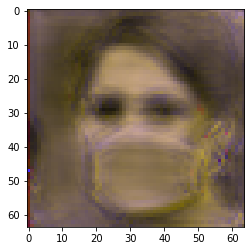

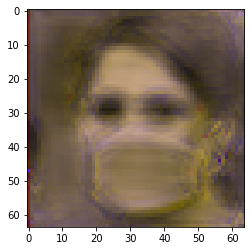

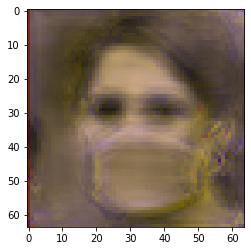

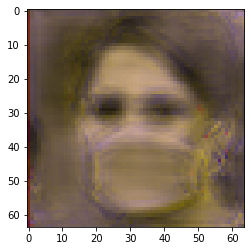

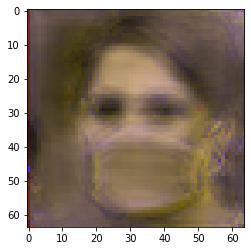

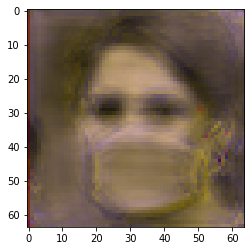

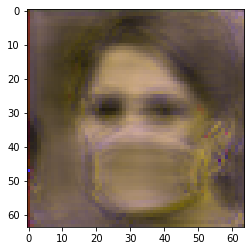

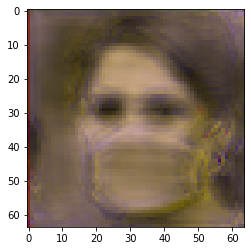

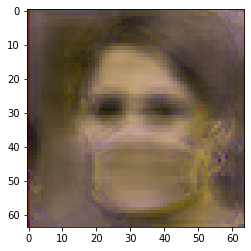

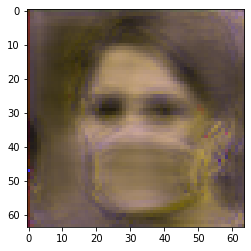

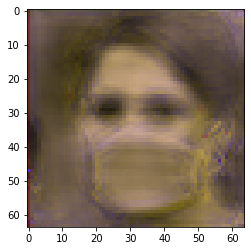

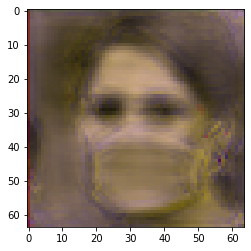

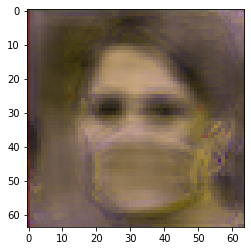

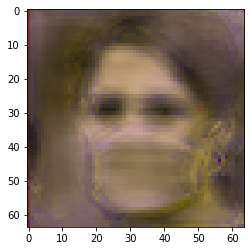

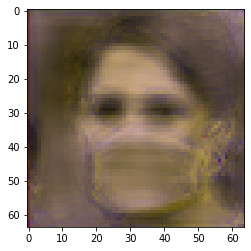

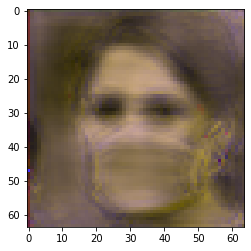

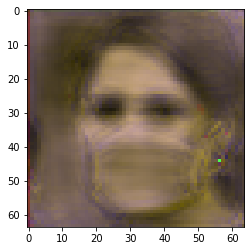

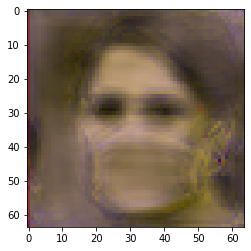

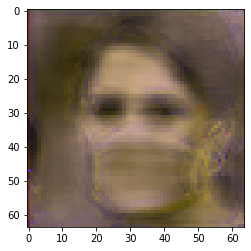

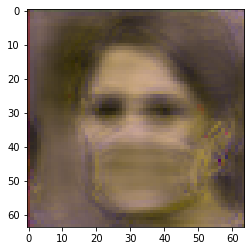

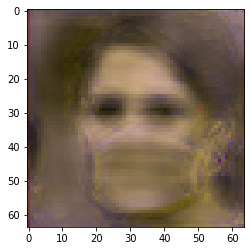

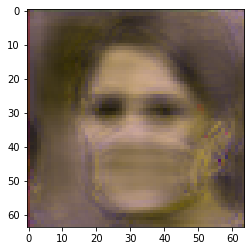

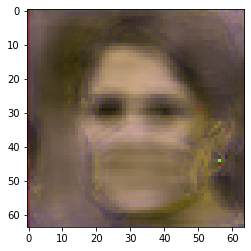

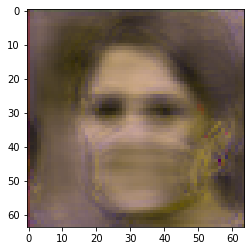

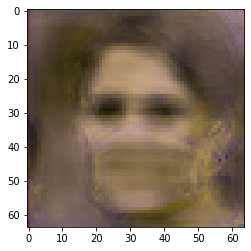

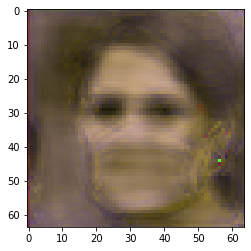

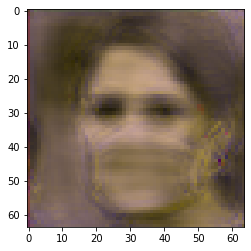

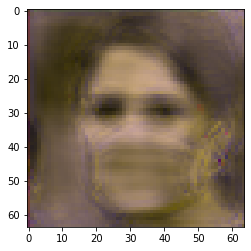

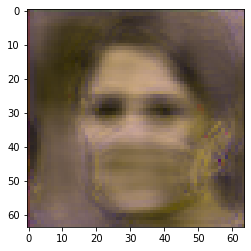

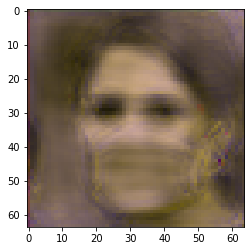

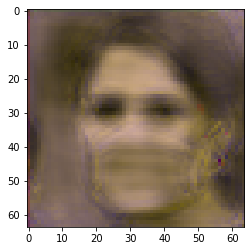

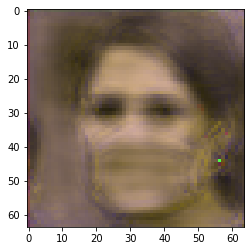

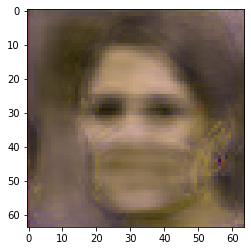

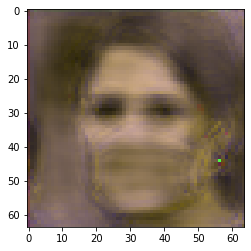

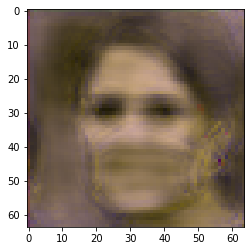

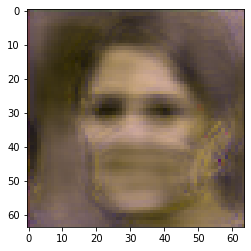

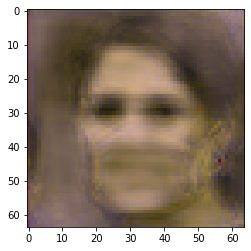

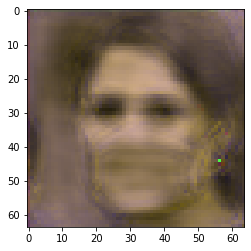

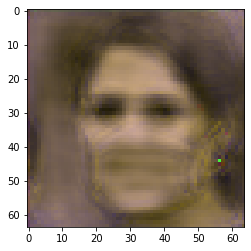

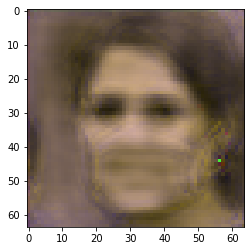

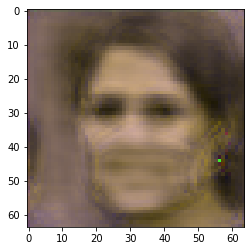

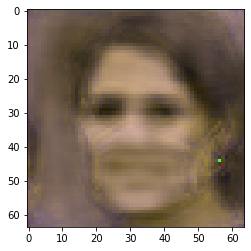

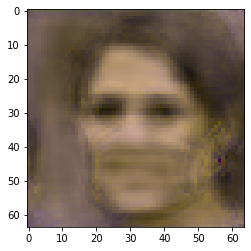

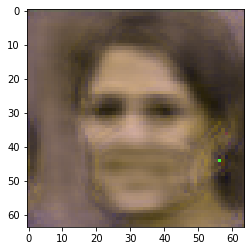

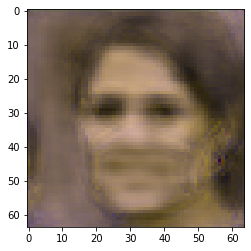

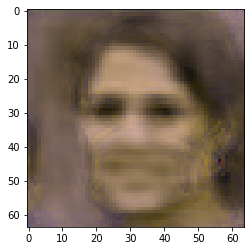

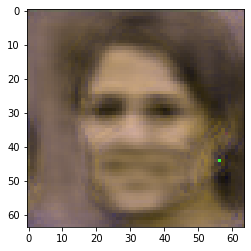

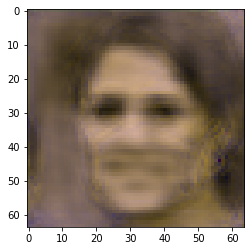

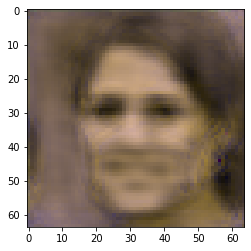

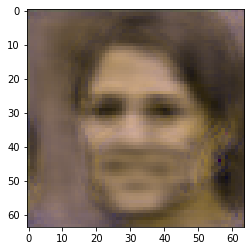

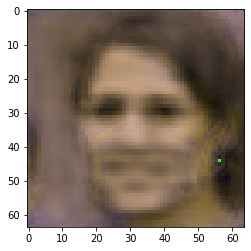

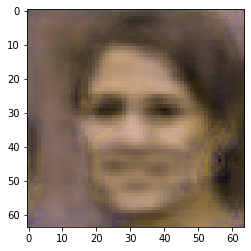

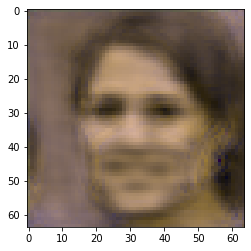

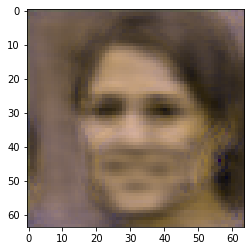

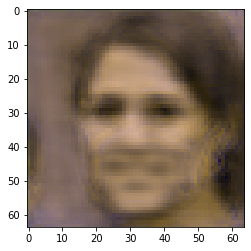

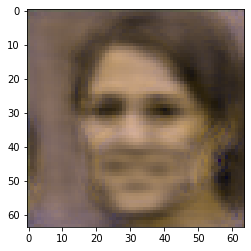

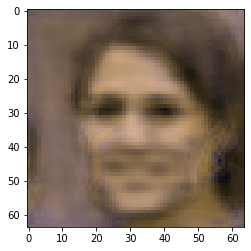

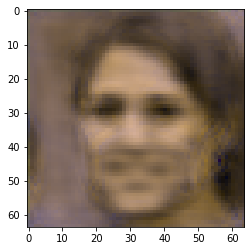

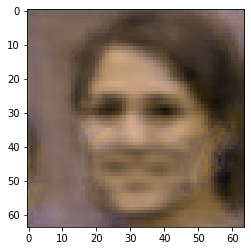

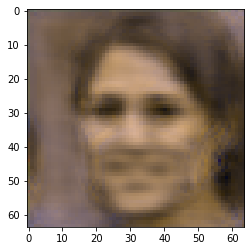

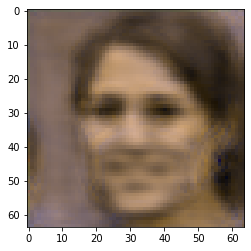

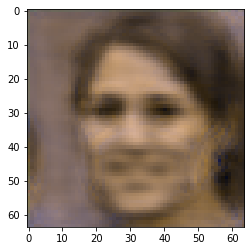

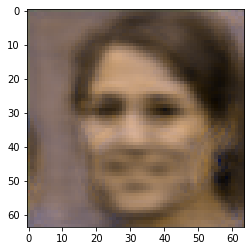

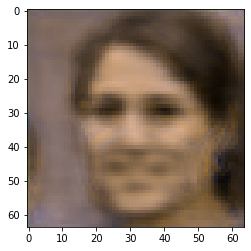

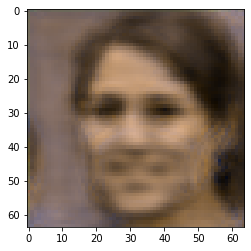

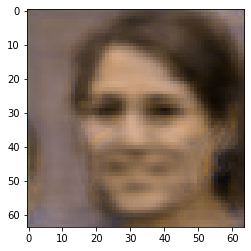

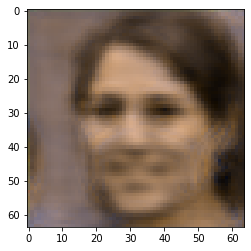

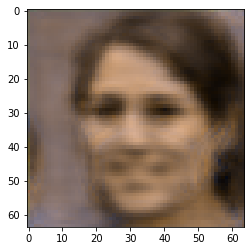

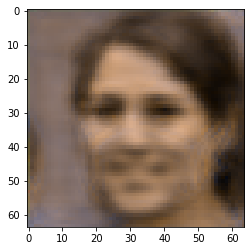

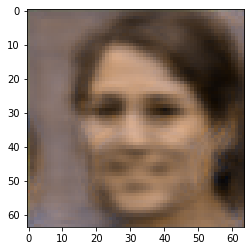

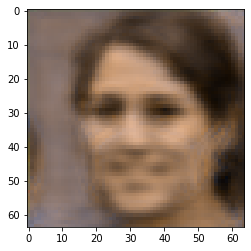

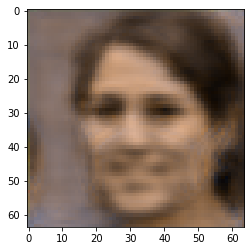

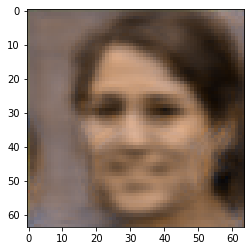

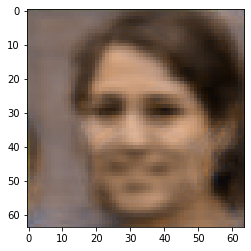

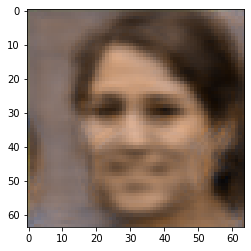

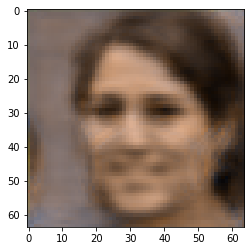

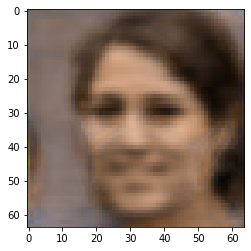

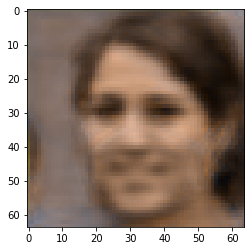

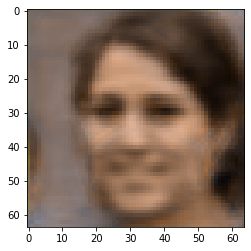

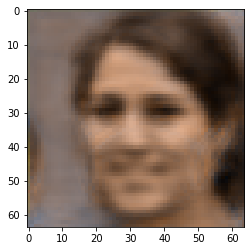

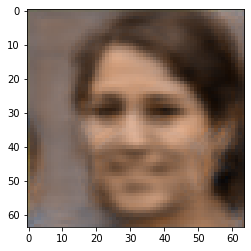

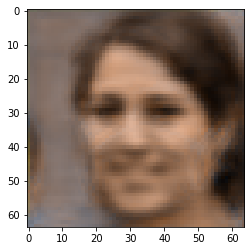

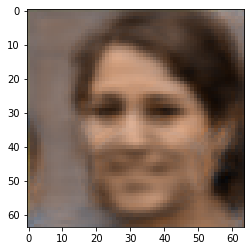

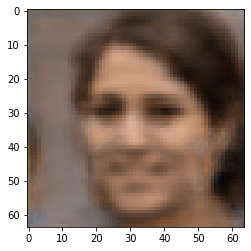

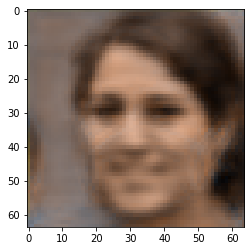

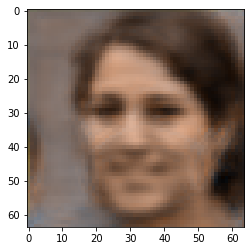

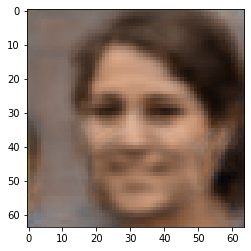

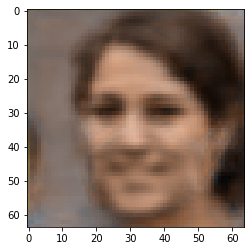

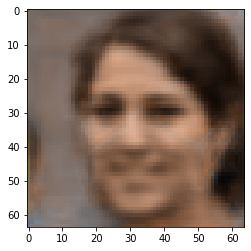

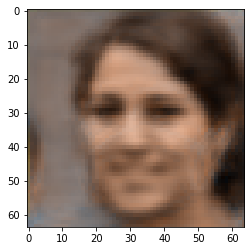

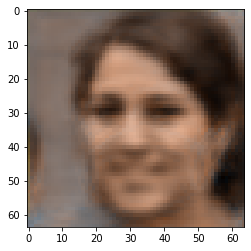

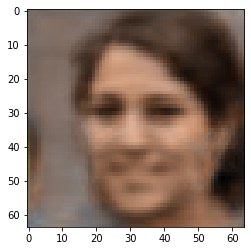

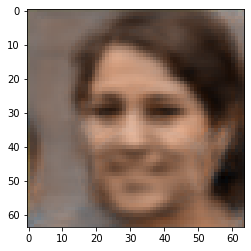

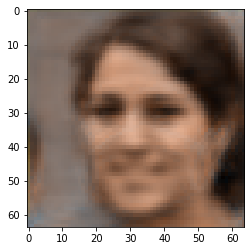

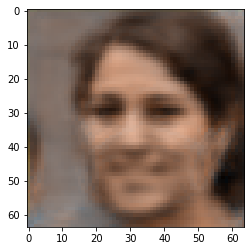

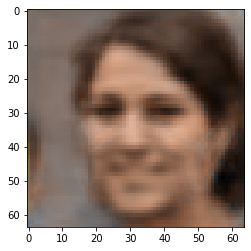

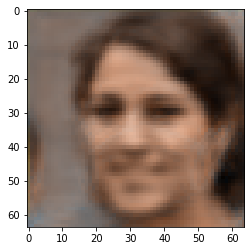

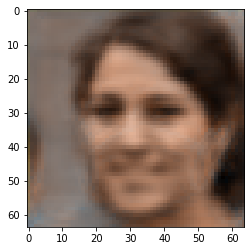

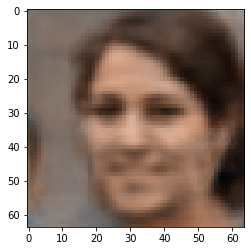

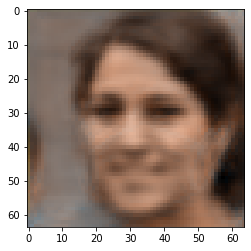

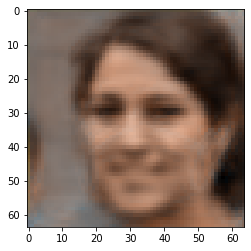

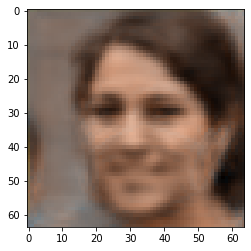

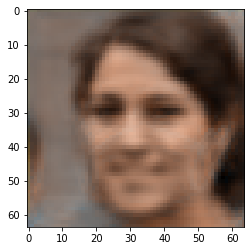

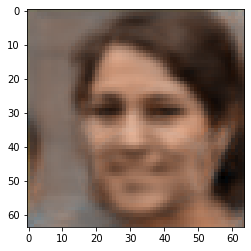

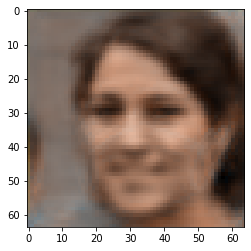

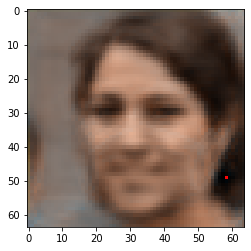

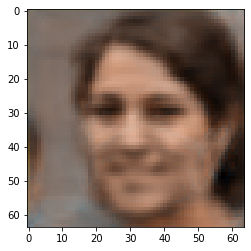

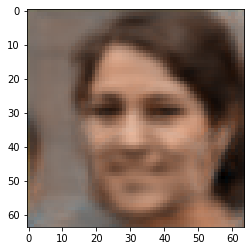

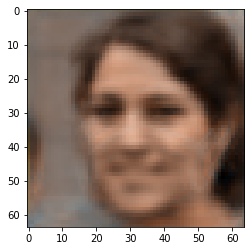

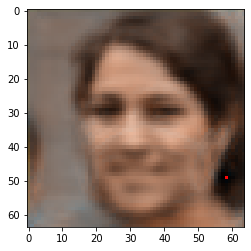

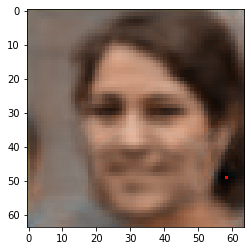

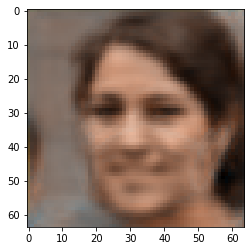

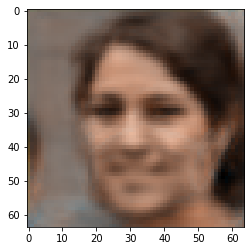

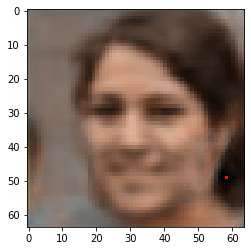

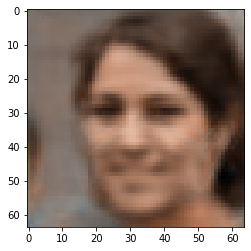

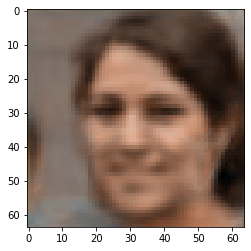

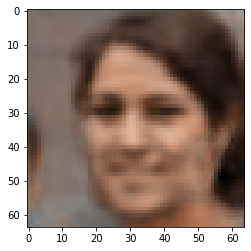

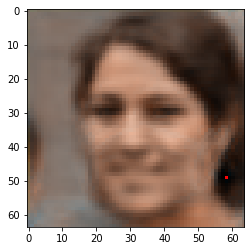

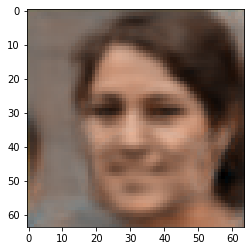

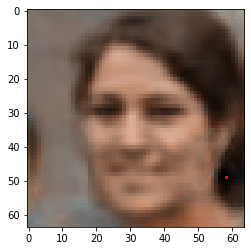

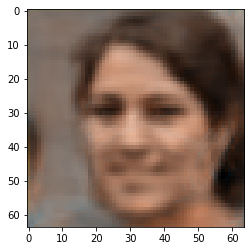

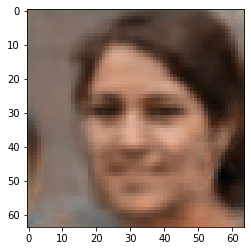

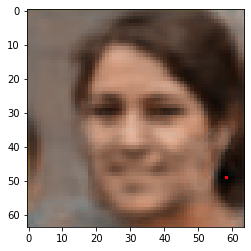

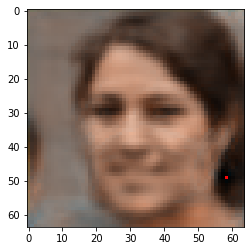

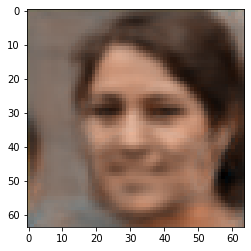

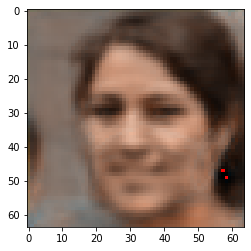

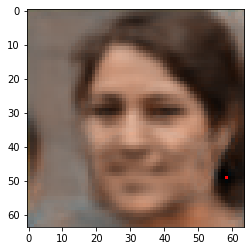

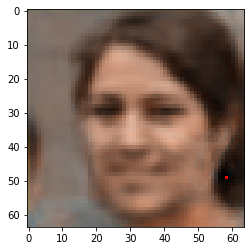

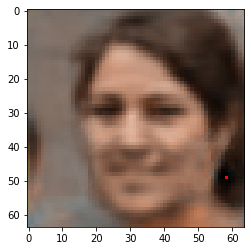

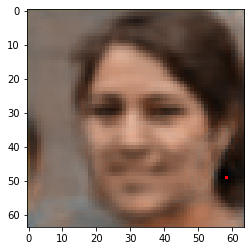

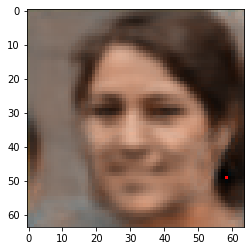

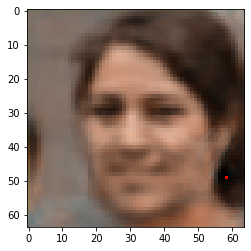

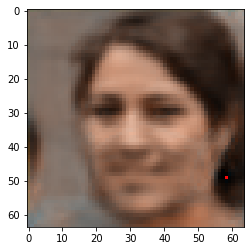

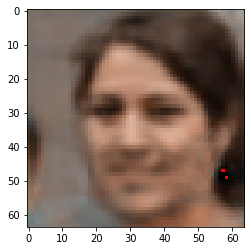

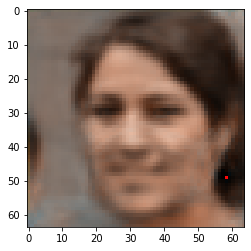

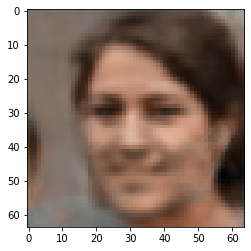

In [33]:
image_nb=1
fig = plt.gcf()
fig.show()
fig.canvas.draw()
for i in range(len(image_log)):
    plt.imshow(image_log[i][image_nb])
    plt.pause(0.05)
    fig.canvas.draw()